In [ ]:

import warnings
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

warnings.filterwarnings("ignore")

In [ ]:
try:
    df = pd.read_csv("data/data_deals_done.csv")
    print(df.columns)
    print(df.shape)
except Exception:
    print("Seems we have a problem")

In [24]:
used_features = [
    'sale_day_month', 
    'street_name', 
    'street_number', 
    'property_type', 
    'rooms_number', 
    'floor',
    'build_year', 
    'building_mr',
    'city'
]


In [25]:
X = df[used_features]
y = df['final_price']


תל אביב יפו
(24242, 14)
Mean squared error: 0.00
Mean squared error sqrt: 0.06232994880221939
Variance score: 0.46
חיפה
(22781, 14)
Mean squared error: 0.00
Mean squared error sqrt: 0.033998309303969264
Variance score: 0.43
באר שבע
(21686, 14)
Mean squared error: 0.00
Mean squared error sqrt: 0.04665068321518631
Variance score: 0.68
ירושלים
(21634, 14)
Mean squared error: 0.00
Mean squared error sqrt: 0.03785575758930404
Variance score: 0.37
פתח תקווה
(14333, 14)
Mean squared error: 0.00
Mean squared error sqrt: 0.027460147167698335
Variance score: 0.36
אשדוד
(13601, 14)
Mean squared error: 0.00
Mean squared error sqrt: 0.040233371476999756
Variance score: 0.62
אשקלון
(13424, 14)
Mean squared error: 0.00
Mean squared error sqrt: 0.03944370600935038
Variance score: 0.49
נתניה
(12948, 14)
Mean squared error: 0.00
Mean squared error sqrt: 0.0400784254056689
Variance score: 0.45
ראשון לציון
(12212, 14)
Mean squared error: 0.00
Mean squared error sqrt: 0.020497292487255944
Variance score: 0

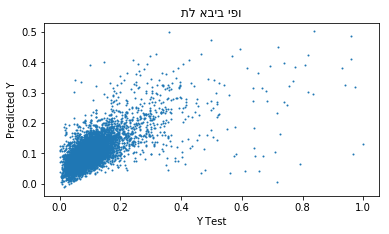

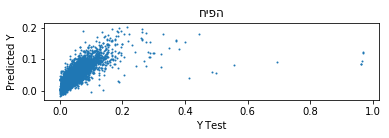

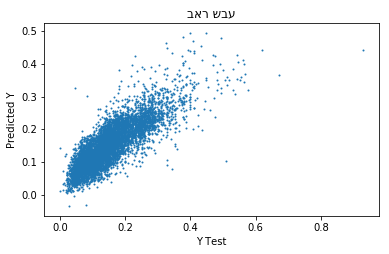

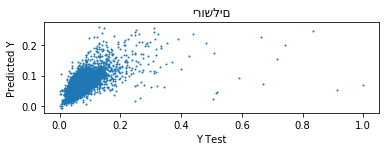

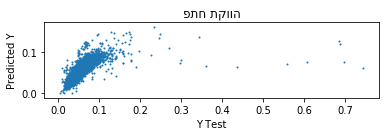

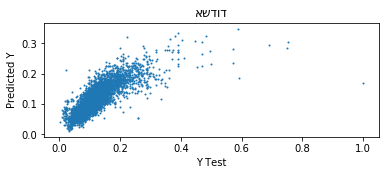

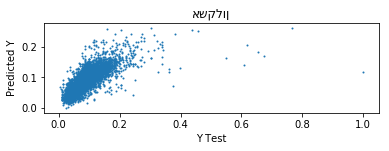

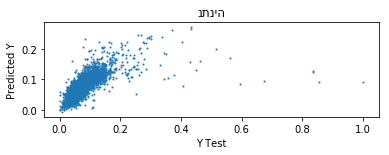

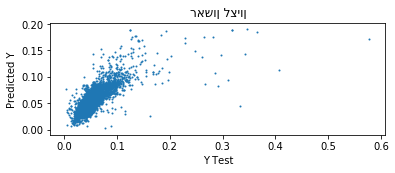

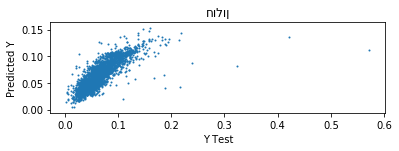

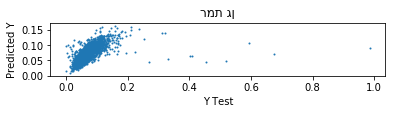

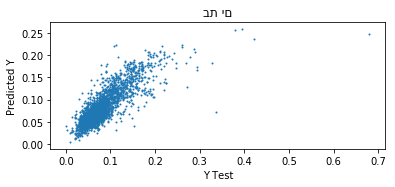

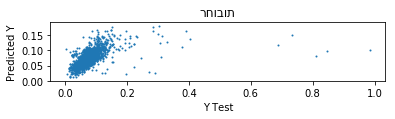

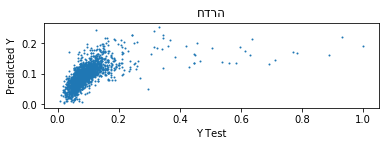

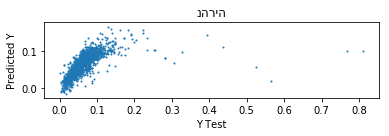

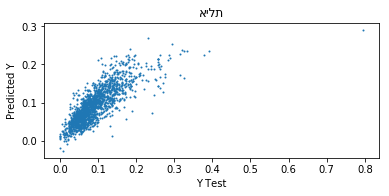

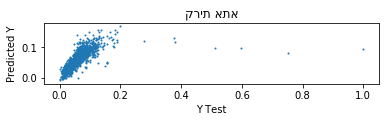

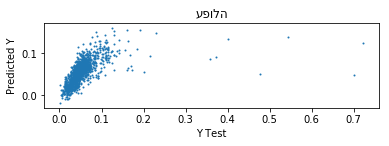

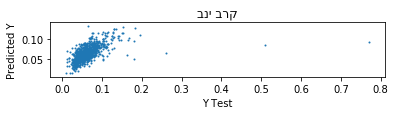

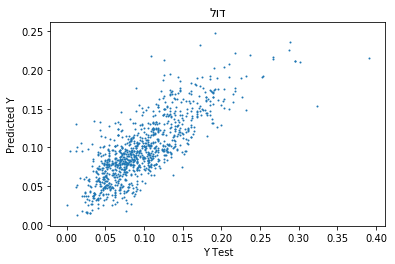

In [36]:
cities = df.groupby(['city']).city.value_counts().nlargest(20)

for city in cities.keys():
    print(city[0])
    _df = df.loc[(df['city'] == city[0])]
    print(_df.shape)
    X = _df[used_features]
    y = _df['final_price']
    
    min_max_scalar = preprocessing.MinMaxScaler()
    y = min_max_scalar.fit_transform(np.array(y).reshape(-1, 1))
    y = pd.DataFrame(y)

    # 1. INSTANTIATE
    # encode labels with value between 0 and n_classes-1.
    # integer encode
    le = preprocessing.LabelEncoder()
    
    # apply the values into the original data
    for row in X[used_features]:
        X[row] = le.fit_transform(_df[row])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    lm = LinearRegression()
    
    lm.fit(X_train, y_train)

    predictions = lm.predict(X_test)
    plt.scatter(y_test, predictions, s=5)
    plt.title(city[0])
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test, predictions))
    print("Mean squared error sqrt:", sqrt(mean_squared_error(y_test, predictions)))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, predictions))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

for city in cities.keys():
    print(city[0])
    _df = df.loc[(df['city'] == city[0])]
    print(_df.shape)
    X = _df[used_features]
    y = _df['final_price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

    rfc = RandomForestClassifier(n_estimators=600)
    rfc.fit(X_train,y_train)

    predictions = rfc.predict(X_test)
    print(classification_report(y_test,predictions))
    print(confusion_matrix(y_test,predictions))
